<a href="https://colab.research.google.com/github/Kamui964/Kmeans_cluster_PCA/blob/master/Kmeans%26PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df=pd.read_csv('/content/Iris Dataset.csv')
print(df.shape)
df.head()

(150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [81]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [82]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [83]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [84]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

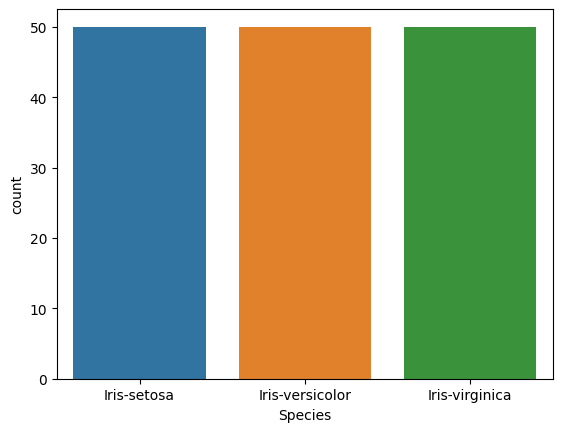

In [85]:
sns.countplot(x='Species', data=df, )
plt.show()

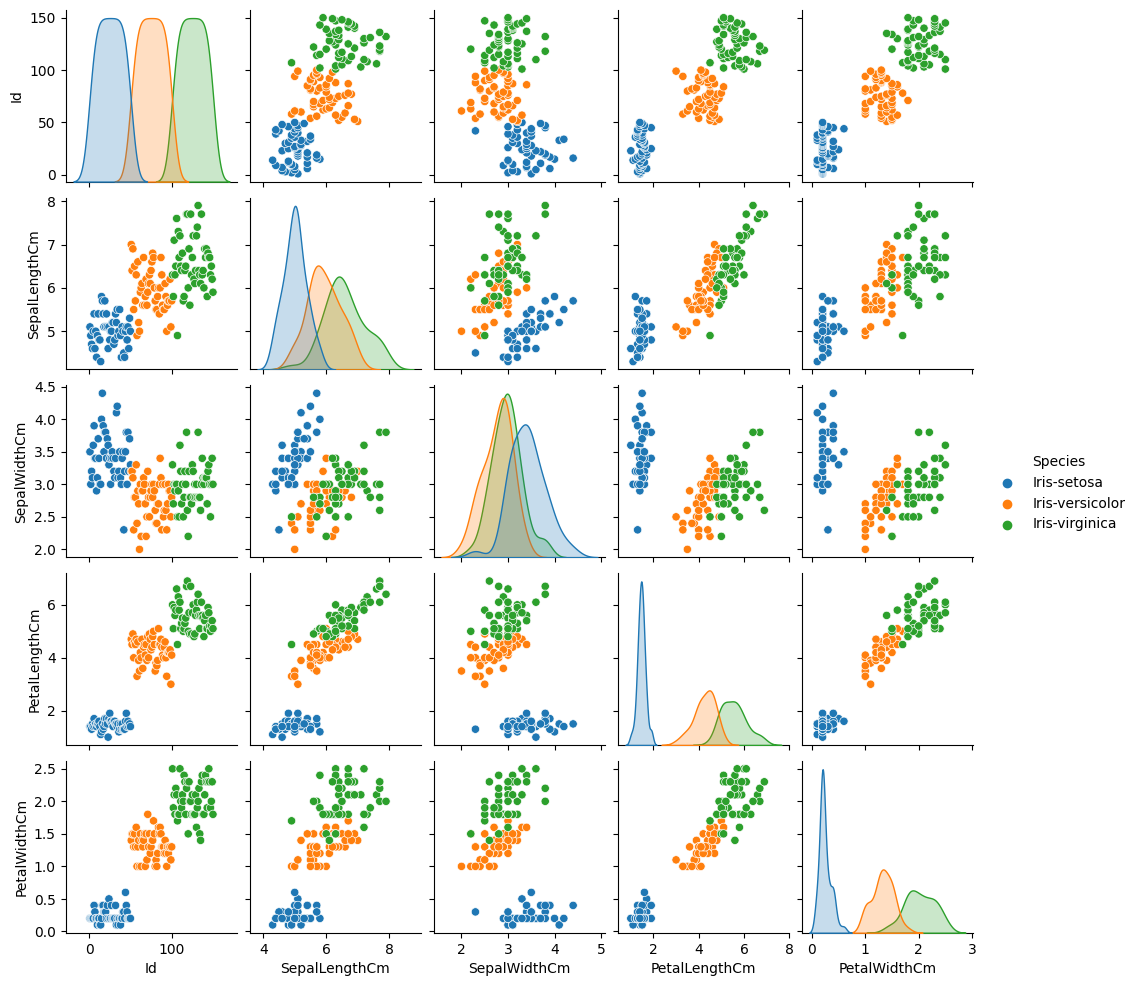

In [86]:
sns.pairplot(df,hue='Species', height=2)

In [87]:
df.corr(method='pearson')

<ipython-input-87-432dd9d4238b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


<ipython-input-88-df13e470386d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="Blues",vmin=-1, vmax=1,annot=True)


<Axes: >

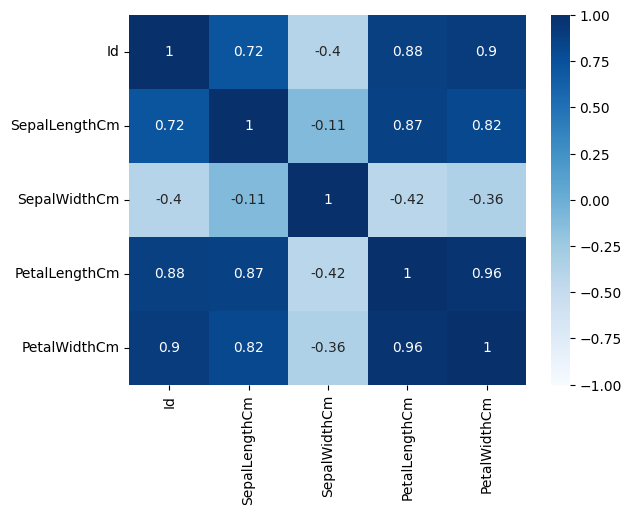

In [88]:
#correlation matrix plot
sns.heatmap(df.corr(), cmap="Blues",vmin=-1, vmax=1,annot=True)

<Axes: xlabel='PetalWidthCm', ylabel='SepalLengthCm'>

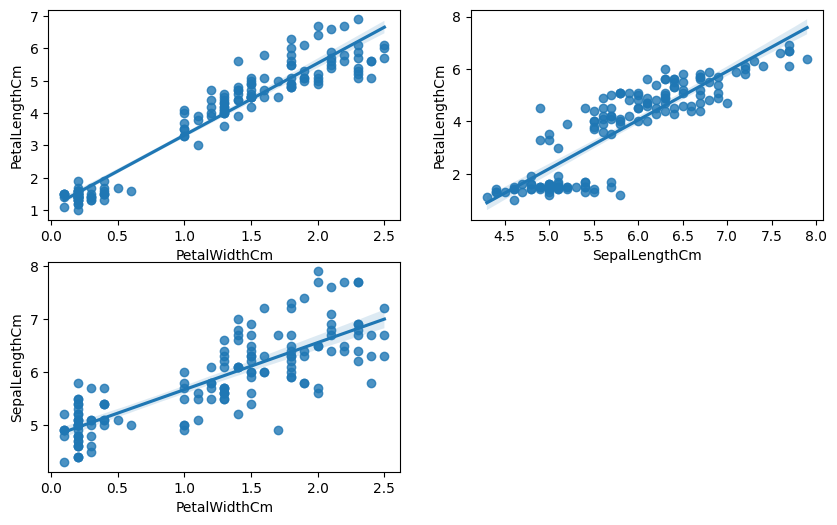

In [89]:
#plots to know relation between PetalWidth, PetalLength and SepalLength
plt.figure(figsize=(10, 6))

plt.subplot(2,2,1)
sns.regplot(x='PetalWidthCm', y='PetalLengthCm', data=df)

plt.subplot(2,2,2)
sns.regplot(x='SepalLengthCm', y='PetalLengthCm', data=df)

plt.subplot(2,2,3)
sns.regplot(x='PetalWidthCm', y='SepalLengthCm', data=df)


In [90]:
#implementing K-means clustering
def kmeans_clustering(dataset, num_clusters):
    # Load dataset
    df = pd.read_csv(dataset)
    species = df['Species']  
    df = df.drop('Species', axis=1)
    data = df.values
    # Randomly initialize cluster centroids
    centroids = data[np.random.choice(data.shape[0], num_clusters, replace=False)]
    
    # Initialize cluster assignments and old centroids
    clusters = np.zeros(data.shape[0])
    old_centroids = np.zeros(centroids.shape)
  
    while not np.array_equal(centroids, old_centroids):
        # Assign each data point to the closest centroid
        for i in range(data.shape[0]):
            distances = np.linalg.norm(data[i] - centroids, axis=1)
            clusters[i] = np.argmin(distances)
        
        # Update centroids
        for j in range(num_clusters):
            centroids[j] = np.mean(data[clusters == j], axis=0)
        old_centroids = np.copy(centroids)
    
    # Plot the cluster assignments
    plt.scatter(data[:, 2], data[:, 3], c=clusters)
    plt.title('K-Means Clustering')
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.show()
    
    # Plot the actual species
    plt.scatter(data[:, 2], data[:, 3], c=species.astype('category').cat.codes)
    plt.title('Actual Species')
    plt.xlabel('Petal Length ')
    plt.ylabel('Petal Width')
    plt.show()

#Implementing Principal Component Analysis
def pca_analysis(dataset):
    df = pd.read_csv(dataset)
    species = df['Species'] 
    df = df.drop('Species', axis=1) 
    data = df.values
    
    # Normalizing data
    data_norm = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
    
    # Computing covariance matrix
    cov_matrix = np.cov(data_norm.T)
    # Performing eigenvalue decomposition
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    # First three eigenvectors for visualization
    projection_matrix = eigenvectors[:, :3]
    data_pca = data_norm.dot(projection_matrix)
    
    # Plot the data in the first three eigenvectors
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=species.astype('category').cat.codes)
    ax.set_title('Principal Component Analysis')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    plt.show()

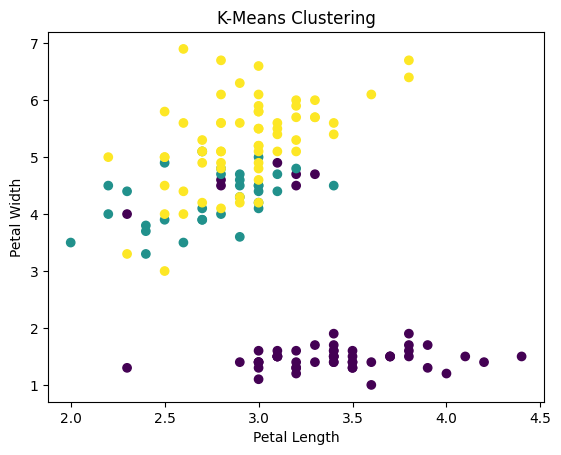

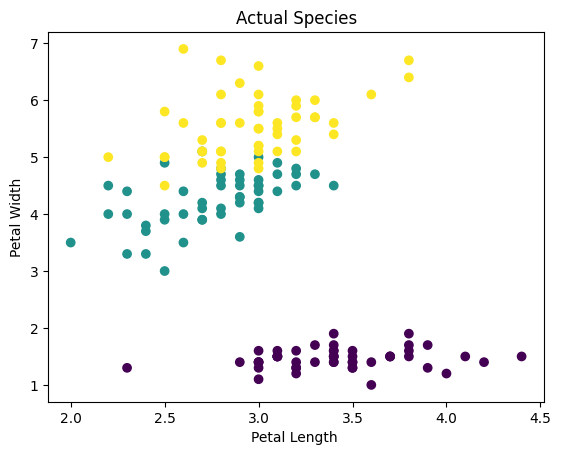

In [96]:
iris_dataset = '/content/Iris Dataset.csv'
# calling K-Means Clustering function
kmeans_clustering(iris_dataset, num_clusters=3)

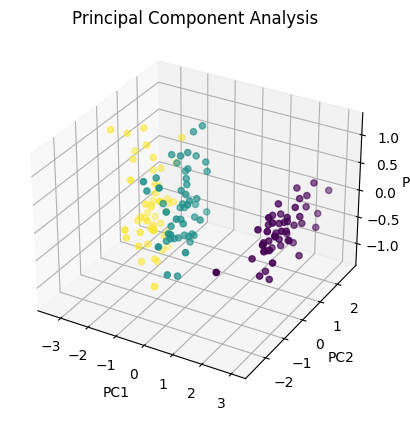

In [92]:
# calling Principal Component Analysis (PCA) function
pca_analysis(iris_dataset)